<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone I</font></h2>

<h1><font color="#00586D" size=5>Análisis de datos de Fórmula 1</font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>
</div>

<div align="left">
<font color="#000000" size=3>Marta Bellón Castro</font><br>
<font color="#000000" size=3>Curso 2022-2023</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Introducción](#section1)
* [2. Conductores](#section2)
* [3. Carreras](#section3)
* [4. Escuderías](#section4)
* [5. Circuitos](#section5)
* [6. Fernando Alonso vs rivales](#section6)
* [7. Conclusiones y líneas de trabajo para TFM](#section7)

---

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:95%} </style>"))
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

---

<a id="section1"></a>
## <font color="#00586D"> 1. Introducción</font>
<br>

En este primer proyecto del máster se trabajará con información sobre la competición de *Fórmula 1* generada desde el año 1950 hasta esta misma temporada. El conjunto datos se ha descargado de Kaggle [(enlace)](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020), aunque a su vez el autor los recopiló del sitio `ergast.com`, que es una base de datos sobre Fórmula 1 que proporciona una API para la consulta [(enlace)](http://ergast.com/mrd/).

A partir de este conjunto de datos, compuesto por 14 archivos `.csv`, se dará respuesta a una serie de cuestiones generales. También, como objetivo más concreto, se proporcionará una visión sobre la trayectoria (hasta el momento) del piloto español Fernando Alonso en esta competición. 

El enfoque de este trabajo, al igual que del primer módulo en su totalidad, es principalmente ***instrumental***. Por tanto, en lugar de llevar a cabo un análisis exploratorio de los datos como tal (esto lo haremos en el Capstone III), se abordarán una serie de ejercicios cuya resolución implicará manipular distintos *DataFrames*, y permitirá poner en práctica las habilidades adquiridas con *pandas* y *matplotlib*. En concreto, se pondrá el foco en *pandas*, ya que la visualización se trabajará en los módulos correspondientes.

Por último, y debido a que éste es el primero de varios proyectos, **la carga de trabajo es importante**. No obstante, os animamos a ampliar el trabajo y construir alguna gráfica más en relación a algún aspecto que despierte vuestra curiosidad. Además, puesto que **una posible linea de TFM es la elaboración de un portfolio** con ampliación de los trabajos de los distintos módulos, podéis enfocar este trabajo adicional en esa línea.

<div class="alert alert-block alert-info">
    
El texto marcado como <i class="fa fa-info-circle" aria-hidden="true"></i> corresponde a un desplegable con ***sugerencias*** que pueden ayudar a resolver los ejercicios. Os animamos, no obstante,  a hacer un intento de resolverlos antes de leerlas.
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Conductores</font>
<br>

El archivo `data/drivers.csv` contiene información identificativa básica sobre los pilotos. Debido a que el proyecto se centrará también en un piloto concreto, `Fernando Alonso`, se tratará esta información en primer lugar.

### <font size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 1</font>

Cargar los datos del archivo `data/drivers.csv` en un *DataFrame* denominado `df_drivers`, mostrar la cabecera y, posteriormente, la información sobre la estructura del *DataFrame*.
<br><br>


<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
* Cargar primero el conjunto de datos, sin utilizar ningún parámetro adicional.

</details>   

In [2]:
# Cargo los datos del archivo
df_drivers = pd.read_csv('./data/drivers.csv', index_col=0)

# Muestro la cabecera
df_drivers.head()

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
# Muestro la información de la estructura
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 1 to 855
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverRef    854 non-null    object
 1   number       854 non-null    object
 2   code         854 non-null    object
 3   forename     854 non-null    object
 4   surname      854 non-null    object
 5   dob          854 non-null    object
 6   nationality  854 non-null    object
 7   url          854 non-null    object
dtypes: object(8)
memory usage: 60.0+ KB




En la información del *DataFrame* puede apreciarse que una columna, `driverId`, corresponde al identificador y se ha codificado como entero. El resto, se han codificado como objetos, incluyendo el número (`number`) o la fecha de nacimiento (`dob`). Además, se aprecia que la nacionalidad (`nationality`) podría ser tratada como una categoría. Aunque todos estos cambios se podrían hacer mediante operaciones (`DataFrame.set_index()` y `DataFrame.astype()`), parece más cómodo volver a leer el archivo.



Volver a cargar el archivo `data/drivers.csv` en un *DataFrame* denominado `df_drivers`. Utilizar ahora como índice la primera columna (`driverId`), que contiene el identificador individual de cada piloto.  Especificar que los valores perdidos se representan como `'\N'`, y que el tipo de datos de las columnas `driverRef`, `code`, `forename`, y `surname` debe ser `string`. Especificar también que `nationality` es una categoría, e indicar que se trate la columna `dob` como un dato temporal mediante el parámetro `parse_dates` de `pd.read_csv()`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Se recomienda echar un vistazo a la primera libreta del tutorial de *Pandas*, en la que se vio `pd.read_csv()`.    
* Para especificar el valor `'\N'` puede utilizarse una secuencia de escape o un *raw string*.

</details>   



In [4]:
new_types={'driverRef': 'string', 
           'code': 'string', 
           'forename': 'string', 
           'surname': 'string', 
           'nationality': 'category'}

df_drivers = pd.read_csv('./data/drivers.csv', parse_dates=['dob'], dtype=new_types, index_col='driverId', na_values='\\N')
df_drivers.head()

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 1 to 855
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverRef    854 non-null    string        
 1   number       51 non-null     float64       
 2   code         97 non-null     string        
 3   forename     854 non-null    string        
 4   surname      854 non-null    string        
 5   dob          854 non-null    datetime64[ns]
 6   nationality  854 non-null    category      
 7   url          854 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(1), string(4)
memory usage: 55.6+ KB


Extraer los datos relativos al piloto `Fernando Alonso`, cuyo código es `ALO`, y almacenarlos en una *Series* denominada `alonso_data`.  Almacenar el identificador correspondiente al piloto en la variable `alonso_id`. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* El resultado de la selección condicional es un *DataFrame* con una fila. Para convertirlo a *Series* se puede utilizar el método `DataFrame.squeeze()`.
* Por otra parte, el identificador es el nombre (`name`) de la *Series* resultante.

</details>   



In [6]:
# Datos de Fernándo Alonso:
alonso_data = df_drivers[df_drivers['code'] == 'ALO']
#print(alonso_data)

# El número de Alonso
alonso_id = alonso_data.index.values[0]
print(f'El numero {alonso_id} es el identificador de Fernándo Alonso.')

El numero 4 es el identificador de Fernándo Alonso.


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font  size=3 color=#00586D> <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Ejercicio 2</font>

Mostrar las filas de `df_drivers`correspondientes a los cinco pilotos más jóvenes.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Existen varios métodos para obtener las filas correspondientes a los valores más altos de una columna. Se puede ordenar el *DataFrame* y acceder a las filas por posición, o devolver directamente las *n* filas con mayor valor mediante un método específico.

</details>   

In [7]:
df_drivers['dob'].nlargest(5)

driverId
852   2000-05-11
846   1999-11-13
855   1999-05-30
854   1999-03-22
853   1999-03-02
Name: dob, dtype: datetime64[ns]

Elaborar, utilizando *matplotlib*, un gráfico de barras que represente el número de pilotos de cada nacionalidad que hay en el *DataFrame* `df_drivers`. Utilizar solamente los datos de las 20 naciones para las que hay más pilotos, añadir el título a la figura, y configurar las etiquetas de la escala del eje X (*ticks*) para que sean legibles.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Este ejercicio se puede hacer de varias formas, pero la más sencilla consiste en obtener el número de veces que aparece cada valor en la columna correspondiente (`nationality`) y tomar los veinte que aparecen de manera más frecuente.
* Existe un método en la API de `Series` que directamente devuelve el número de veces que aparece cada valor.
* En el ejercicio práctico de *pandas* y *matplotlib* se elaboraron varias gráficas de barras.

</details>   

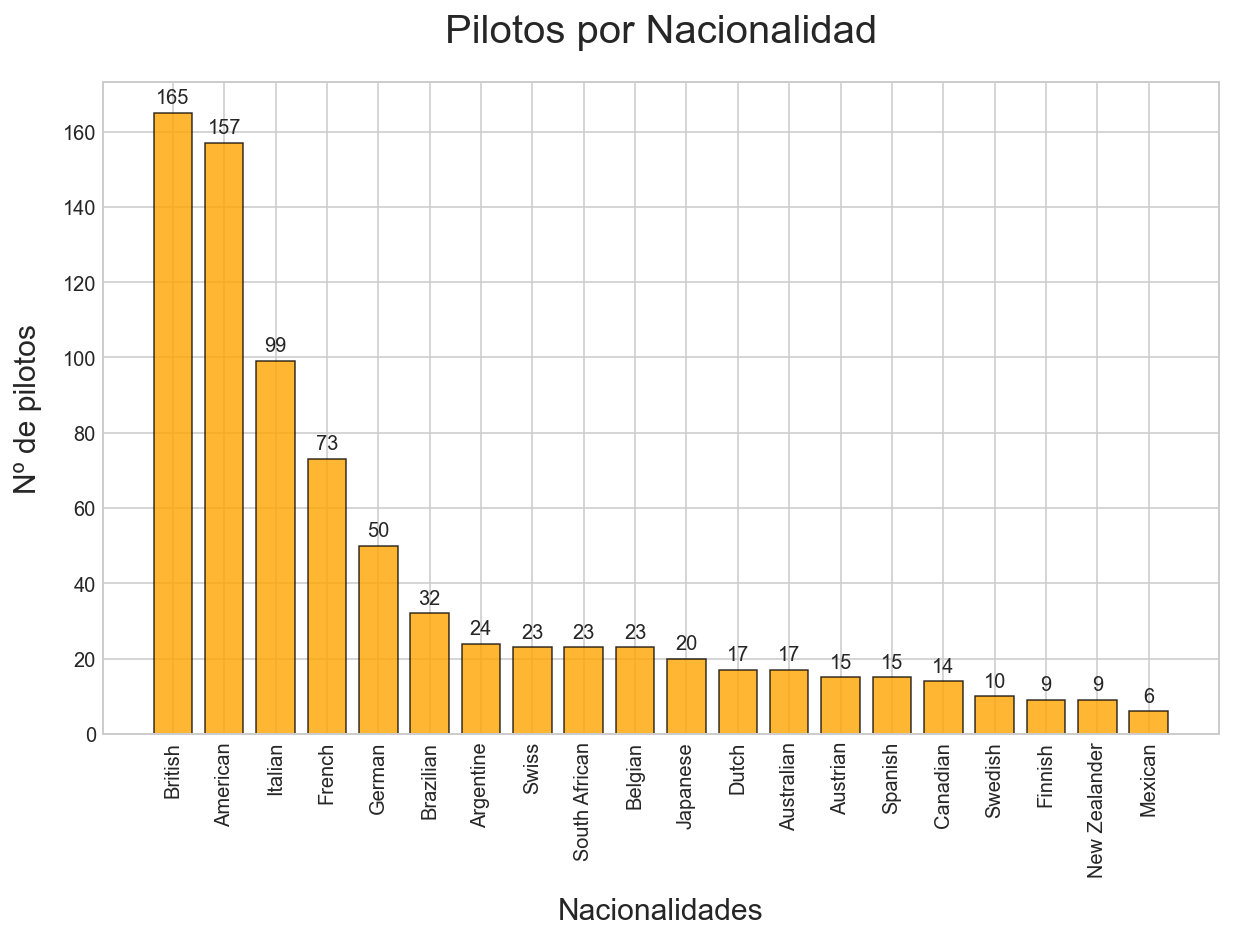

In [8]:
df_drivers_nationality = df_drivers['nationality'].value_counts().head(20)
#print(df_drivers_nationality)

# Creo la gráfica de barras
fig, ax = plt.subplots(1,1, figsize=(10,6))

x = df_drivers_nationality.index
y = df_drivers_nationality.values

ax.bar(x,y, width=0.751, alpha=0.8, color='orange', edgecolor='black', linewidth=0.75)
ax.set_title('Pilotos por Nacionalidad', fontsize=20, pad=20);

ax.set_xlabel('Nacionalidades', fontsize=15, labelpad=10)
ax.set_ylabel('Nº de pilotos', fontsize=15, labelpad=10)
ax.tick_params(axis = 'x', direction='in', labelrotation=90, labelsize=10)


def add_value_label(x,y):
    for i in range(1, len(x)+1):
        plt.text(i-1, y[i-1]+1.5, y[i-1], ha="center", va='bottom')

add_value_label(x,y)

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. Carreras</font>
<br>

Una vez obtenidos los datos relativos a pilotos, se trabajará con la fuente de información  más importante en este conjunto de datos: los resultados de las carreras, que están recogidos en el archivo `data/results.csv`. Cada fila contiene información sobre la participación de un piloto (`driverId`) en una carrera (`raceId`). Además de la posición, contiene información relativa a tiempos, vuelta más rápida, mayor velocidad, etc, que también permitirá hacer otros análisis posteriormente.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 3</font>  

El archivo `data/results.csv` contiene los resultados de todas las carreras. Cargar los datos en el *DataFrame* `df_results`. Utilizar la primera columna (`resultId`) como índice. Especificar, igual que anteriormente, que los valores perdidos se representan con `'\N'`. Mostrar la cabecera.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Se recomienda echar un vistazo a la primera libreta, en la que se vió `pd.read_csv()`.    
* Para especificar el valor `'\N'` puede utilizarse una secuencia de escape o un *raw string*.

</details>   

In [9]:
df_results = pd.read_csv('./data/results.csv', index_col='resultId', na_values='\\N')
df_results.head()

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


Dibujar un histograma (con *matplotlib*) con el número de carreras (resultados) por piloto. Utilizar 100 intervalos. ¿Qué se aprecia?


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* El método `plt.hist()` / `ax.hist()` acepta un parámetro que determina el número de *bins*.    
</details>   

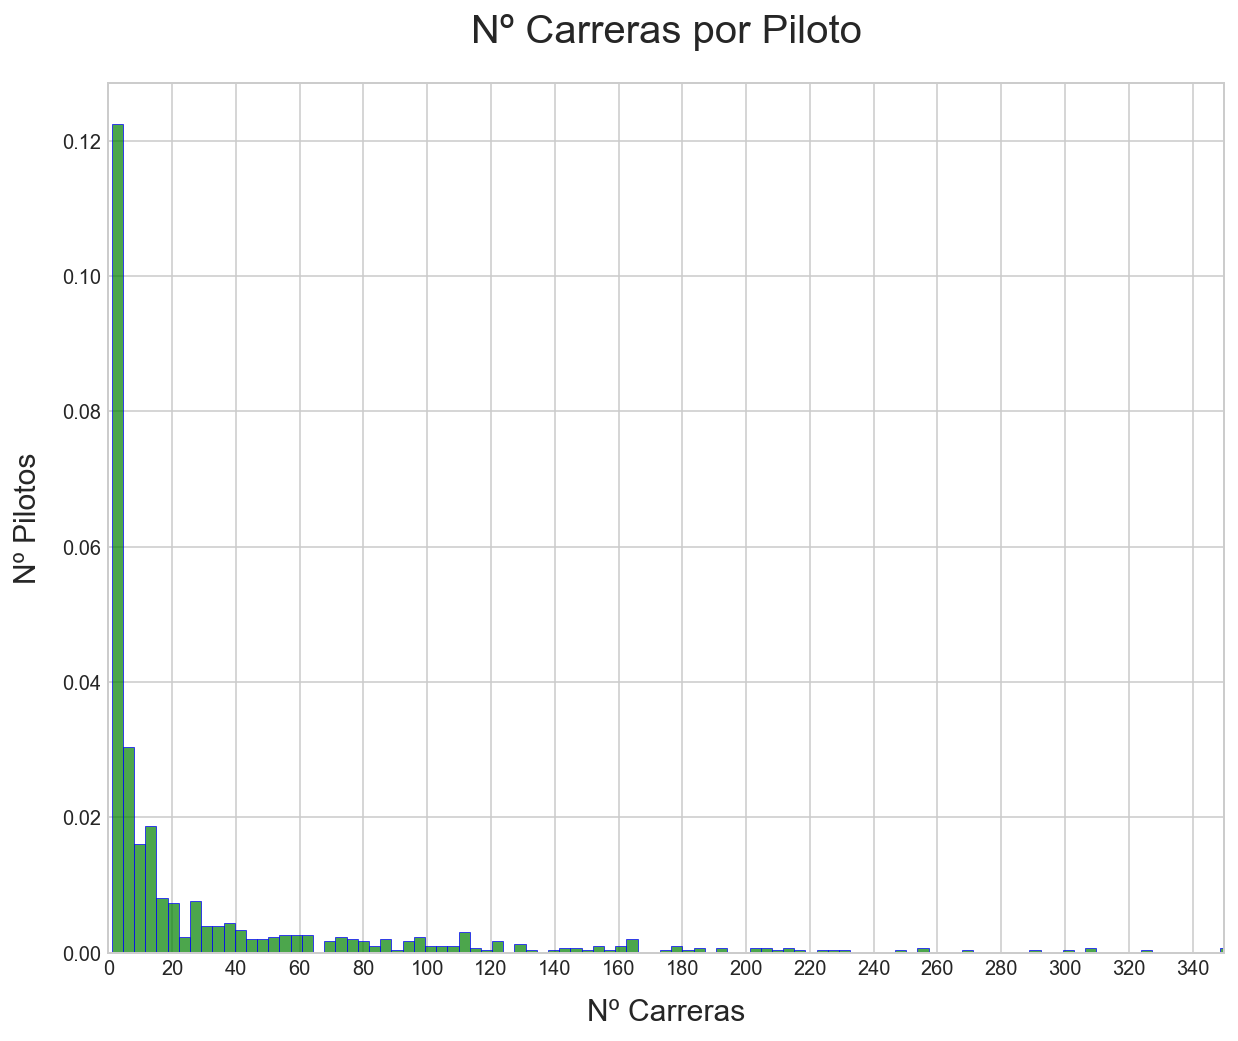

In [10]:
f, ax = plt.subplots(figsize=(10,8))
ax.hist(df_results[['driverId']].value_counts(), bins=100, density=True, facecolor='g', edgecolor='blue', linewidth=0.5, alpha=0.7);

# Modifico las marcas horizontales de la grafica
ax.set_xticks(range(0,350,20));

# Reduzco la grafica ya que no hay valores interesantes
ax.set_xlim(0, 350); 
ax.set_title('Nº Carreras por Piloto', fontsize=20, pad=20);
ax.set_xlabel('Nº Carreras', fontsize=15, labelpad=10);
ax.set_ylabel('Nº Pilotos', fontsize=15, labelpad=10);


## Se observa como lo más frecuente es que los pilotos realicen una sola carrera. Sólo unos pocos realiza más de 300 carreras.
## La distribución es asimétrica con cola a la derecha (sesgada a la derecha)

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 4</font>  

El conjunto de datos `data/races.csv` contiene información relativa a cada una de las carreras. Almacenarlo en un *DataFrame* denominado `df_races`, utilizando la columna `raceId` (la primera) como índice. Especificar que el campo `date` ha de considerarse como una fecha. Utilizar para ello el parámetro `parse_dates`. Inspeccionar el *DataFrame*.

In [11]:
df_races = pd.read_csv('./data/races.csv', parse_dates=['date'], index_col='raceId', na_values='\\N')
df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Al inspeccionar el *DataFrame* se observa que la columna `time` está expresada como una cadena de texto. Generar una nueva *Series* con los valores de la columna `time` convertidos a marcas de tiempo.  ¿Qué se aprecia?


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Utilizar `pd.to_datetime()`.    
</details>  

In [12]:
import datetime
#df_races.info()

In [13]:
# Transformo los datos a temporales, quitando la fecha de hoy con .dt.time (se escribe automaticamente con .to_datetime())
series_time= pd.to_datetime(df_races['time']).dt.time
series_time

## Se aprecia que las horas mostradas son las correspondientes al inicio de la carrera

raceId
1       06:00:00
2       09:00:00
3       07:00:00
4       12:00:00
5       12:00:00
          ...   
1092    05:00:00
1093    19:00:00
1094    20:00:00
1095    18:00:00
1096    13:00:00
Name: time, Length: 1079, dtype: object

Crear una columna denominada `df_races[date time]` en la que se represente la fecha y hora en la que tuvo lugar cada carrera. Para ello, es necesario convertir a `TimeDelta` el contenido de la columna `time`, y sumárselo a la columna `date`.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* La conversión a `TimeDelta` se hace con `pd.to_timedelta()`.  
</details>  

In [14]:
df_races['date time'] = df_races['date'] + pd.to_timedelta(df_races['time'])
df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,date time
raceId,,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-29 06:00:00
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-05 09:00:00
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-19 07:00:00
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-26 12:00:00
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-10 12:00:00


Eliminar las columnas `date` y `time`. También las relativas a las horas de entrenamiento libres (`fpx_`), calificaciones (`qualy_`) y sprints (`sprint_`). Mover la nueva columna, `date time`, a la posición que ocupaba `date`. Es decir, el *DataFrame* resultante debe tener 5 columnas: `year`, `round`, `circuitId`, `date time` y `url`.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* En este caso, lo más sencillo para hacerlo es seleccionar las columnas de interés en el orden que se pide.
</details>  

In [15]:
df_races = df_races[['year','round','circuitId','date time','url']]
df_races.head()

,year,round,circuitId,date time,url
raceId,,,,,
1,2009,1,1,2009-03-29 06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,2,2009-04-05 09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,3,17,2009-04-19 07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,4,3,2009-04-26 12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,5,4,2009-05-10 12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 5</font>  

Crear una figura con dos gráficos de barras. En el de la izquierda se han de mostrar las carreras que han tenido lugar en cada mes del año. En el de la derecha, las que han tenido lugar en cada hora. Ambas gráficas deben compartir la escala en el eje *y*.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Por comodidad se pueden obtener, como paso previo a la creación de cada gráfica, dos *Series* intermedias denominadas `races_month` y `races_hour`. 
* También es importante tener en cuenta que tanto el mes como la hora son accesibles a través `df_races['date time'].dt`.
* Se ha de crear una figura con dos gráficas mediante `plt.subplots()`.
* En la última sesión de ejercicios de *pandas* y *matplotlib* se vieron gráficas parecidas.
</details>  

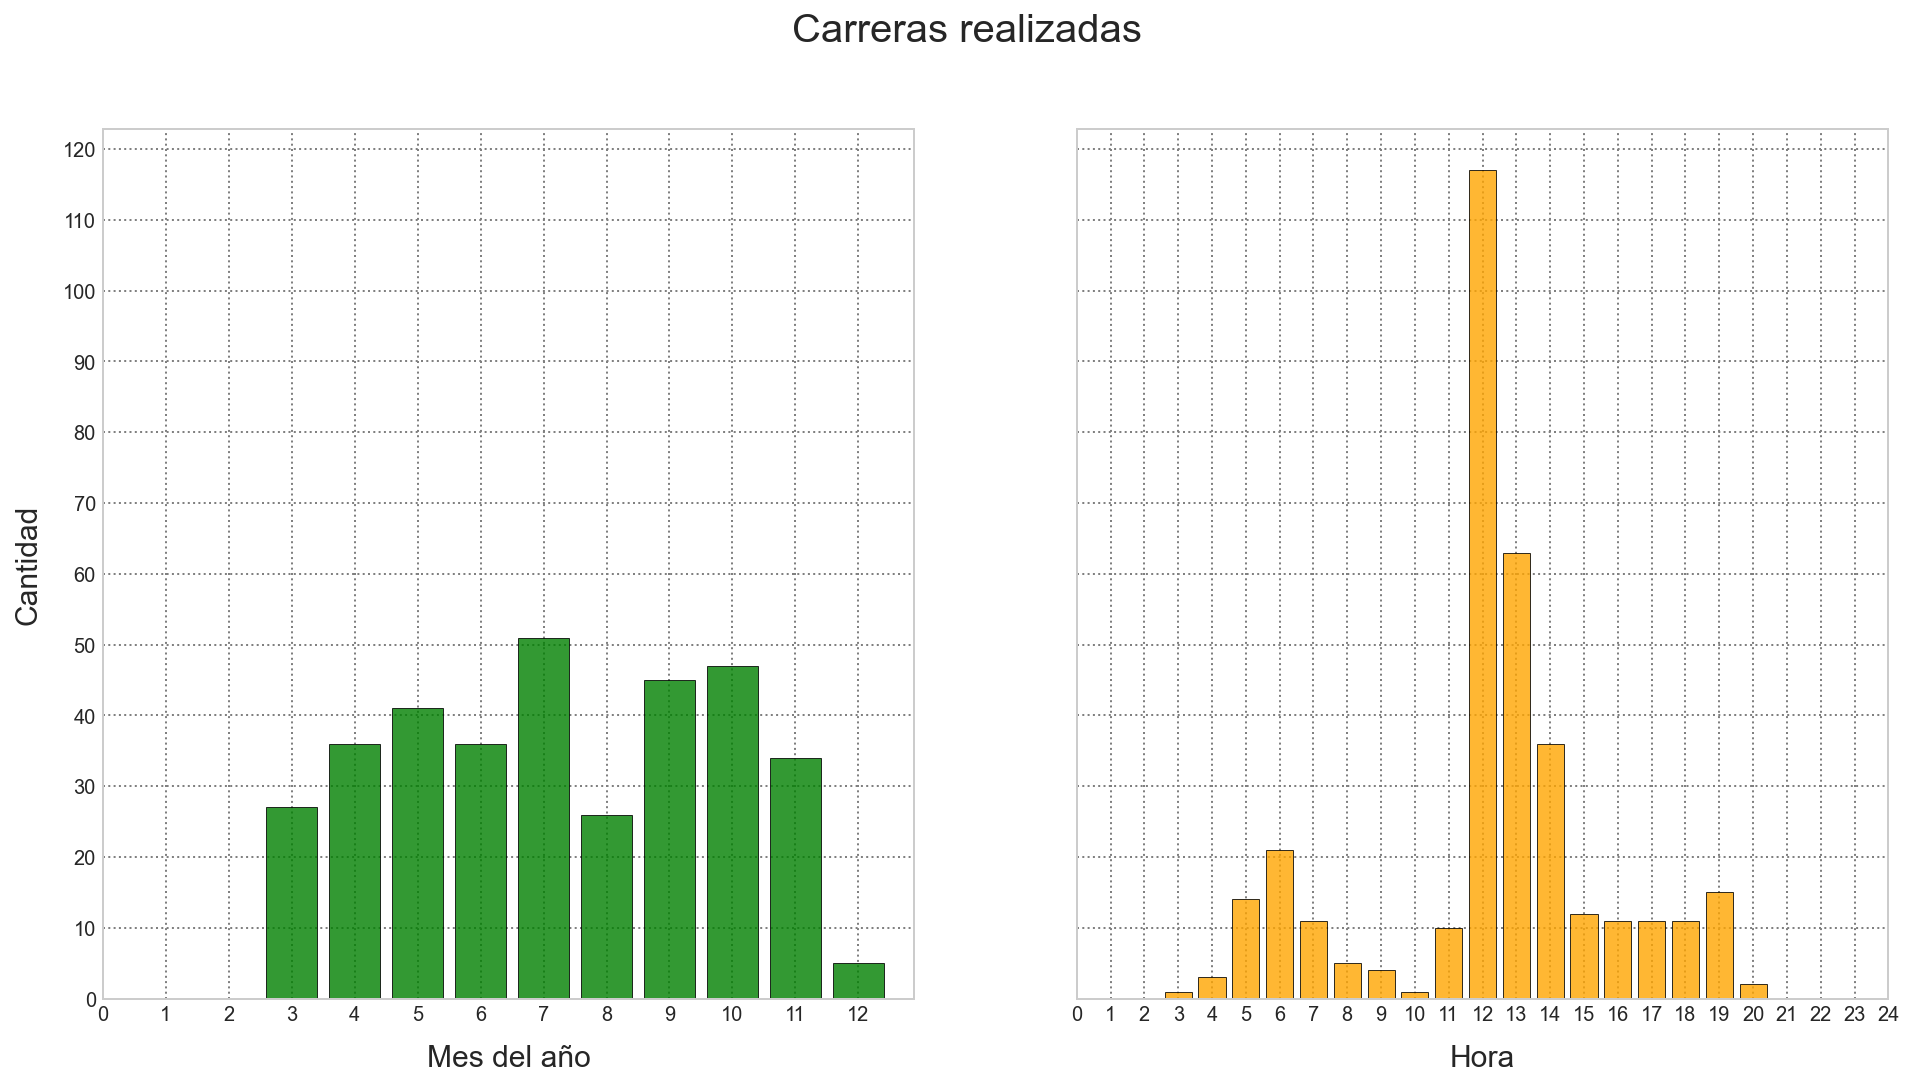

In [16]:
# Series de mes y hora
series_races_month = df_races['date time'].dt.month;
series_races_hour = df_races['date time'].dt.hour;

# Creo la figura con dos gráficas
fig, axes = plt.subplots(1,2, figsize=(16,8), sharey=True);

axes[0].bar(series_races_month.value_counts().index, series_races_month.value_counts().values, label='Carreras por mes', facecolor='g', edgecolor='black', linewidth=0.5, alpha=0.8)
axes[1].bar(series_races_hour.value_counts().index, series_races_hour.value_counts().values, label='Carreras por hora', facecolor='orange', edgecolor='black', linewidth=0.5, alpha=0.8)

fig.suptitle('Carreras realizadas', fontsize=20);
axes[0].set_xlabel('Mes del año', fontsize=15, labelpad=10);
axes[1].set_xlabel('Hora', fontsize=15, labelpad=10);
axes[0].set_ylabel('Cantidad', fontsize=15, labelpad=10);

axes[1].tick_params(axis = 'both', labelsize=10)
axes[0].set_xticks(range(0,13,1));
axes[1].set_xticks(range(0,25,1));
axes[0].set_yticks(range(0,130,10));

axes[0].grid(which='major', color='grey', linestyle=':', linewidth=1)
axes[1].grid(which='major', color='grey', linestyle=':', linewidth=1)


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 6</font>  

La columna `statusId` de `df_results` contiene un código numérico que representa el estado en que cada coche/piloto concluyó cada carrera. El conjunto de datos `data/status.csv` contiene la descripción del estado. Leer este archivo y almacenarlo en el *DataFrame*. `df_status`.

In [17]:
df_status = pd.read_csv('./data/status.csv', index_col='statusId')
df_status.head()

,status
statusId,
1,Finished
2,Disqualified
3,Accident
4,Collision
5,Engine


Utilizar ambos *DataFrames*, `df_results` y `df_status`, para elaborar un diagrama de sectores en el que se visualicen las 10 causas más frecuentes que han impedido terminar a los pilotos las carreras. Utilizar un tamaño de figura $6 \times 6$.



<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Hay que obtener el número de veces que aparece cada estado de terminación dentro del *DataFrame* `df_results` y obtener los once más frecuentes. Por otra parte, el estado 1 representa la finalización, por lo que hay que descartarlo. El resultado se puede almacenar en una serie denominada `causes`.
* Para elaborar la gráfica hay que obtener los nombres de los estados a partir de los códigos obtenidos y desde el DataFrame `df_status` y utilizarlos como etiqueta.
* Los diagramas de sectores se hacen con `plt.pie()` / `ax.pie()`. Podéis consultar la API [**(+inf)**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) o ejemplos [**(+inf)**](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py).
</details>  



In [18]:
# Cuento las veces que aparece el estado de terminación y obtengo los 11 mas frecuentes
df_results_finish = df_results['statusId'].value_counts()
#print(df_results_finish.head(11))

# Descarto el estado de terminación 1 y guardo el resultado como causes
causes = df_results_finish.drop(df_results_finish.index[[0]], inplace=False).head(10)
#print(causes)

In [19]:
# Obtengo los id de las causas más frecuentes
id_causes = causes.index[:].tolist()
#print(f'Los id de las causas mas frecuentes son: {id_causes}')

# Obtengo los nombres de las causas más frecuentes
status = df_status.loc[id_causes].values.tolist()
#print(f'Las causas mas frecuentes son: {status}')

# Como es una lista de listas, lo transformo en una lista
status_list = [item for sublist in status for item in sublist]
#print(f'Las causas mas frecuentes son: {status_list}')


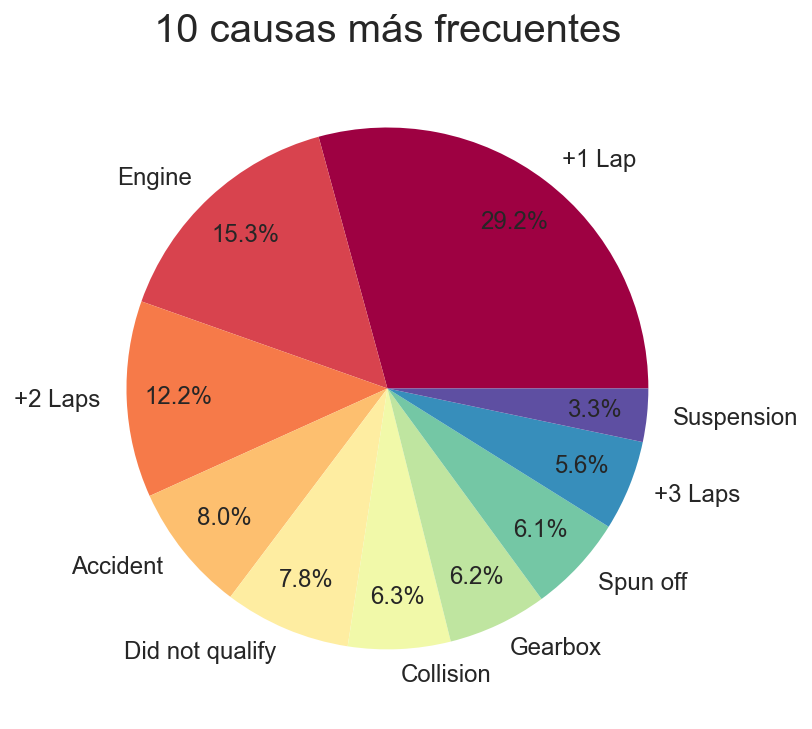

In [20]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

x = causes/sum(causes)*100
y = causes

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(y, shadow=False, startangle=0, autopct='%1.1f%%', pctdistance=0.8, labels=status_list, colors=colors, textprops={'fontsize': 12})
ax.set_title('10 causas más frecuentes', fontsize=20, pad=10);


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 7</font>


Mostrar el nombre, apellido, nacionalidad y número de victorias de los cinco pilotos que acumulan más victorias.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
Este ejercicio se puede resolver en varios pasos.
    
1. La victoria se representa con el  valor 1 en la columna `position`. Se han de seleccionar los resultados correspondientes a victorias y almacenarlos en un nuevo *DataFrame*.
2. Sobre el *DataFrame* anterior, agrupar por conductor, calcular el tamaño de cada grupo y devolver los 5 mayores grupos y su tamaño. Como se opera sobre una *Series*, el resultado es otra *Series* que se puede convertir en *DataFrame* mediante `Series.to_frame()`. En ese *DataFrame* resultante se puede renombrar la única existente a `wins`.
3. Se debe hacer un `pd.merge()` entre el *DataFrame* obtenido y `df_drivers`.En todos las operaciones de fusión se ha de tener en cuenta qué índices se incluyen en el *DataFrame* resultante.
4. Por último, se accede a las columnas de interés: nombre y apellido del piloto, nacionalidad, y victorias.    
    
</details>  


In [21]:
#df_drivers.head()

In [22]:
#df_results.head()

In [23]:
df_results_pilots = df_results[df_results['position']==1]
#df_results_pilots.head()

In [24]:
# Obtengo los datos de id del piloto y su posición en la carrera (victoria)
df_results_pilots = df_results_pilots[['driverId', 'position']]
#df_results_pilots.head(20)

In [25]:
# Cuento las victorias de cada piloto y lo almaceno en una columna llamada wins
series = df_results_pilots['driverId'].value_counts().nlargest(5)
dataframe = series.to_frame(name= 'wins')
#dataframe

In [26]:
# Renombro el indice como driverId
dataframe.index.names = ['driverId']
#dataframe

In [27]:
# Hago el merge entre los dos df, utilizando la columna driverId como nexo de union
df_merge = pd.merge(df_drivers,dataframe, how='outer', on='driverId')

# Selecciono las columnas que me interesan
df_merge = df_merge[['forename', 'surname', 'nationality', 'wins']]

# El tipo de wins paso de entero a decimal, asi que lo cambio de nuevo a entero
df_merge['wins'] = df_merge['wins'].astype('Int64')

# Muestro la cabecera
df_merge = df_merge.sort_values(by='wins', ascending=False).head()
df_merge

,forename,surname,nationality,wins
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,91
20,Sebastian,Vettel,German,53
117,Alain,Prost,French,51
102,Ayrton,Senna,Brazilian,41


In [28]:
## Resuelvo el ejercicio por method chaining

df_results_pole = pd.merge(df_drivers, df_results[df_results['position']==1][['driverId']].value_counts().nlargest(5).to_frame(name='wins'), how='inner', on='driverId')[['forename', 'surname', 'nationality', 'wins']]
df_results_pole.nlargest(5, 'wins')

,forename,surname,nationality,wins
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,91
20,Sebastian,Vettel,German,53
117,Alain,Prost,French,51
102,Ayrton,Senna,Brazilian,41


Mostrar el nombre, apellido, nacionalidad y número *pole positions* de los cinco pilotos que acumulan más sesiones de calificación han ganado. La posición de un piloto en la calificación de cada carrera viene dada por la columna `grid`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
* Este ejercicio es similar al anterior, pero en este caso hay que acceder a las filas correspondientes a las calificaciones (`grid`), y el *DataFrame* debe incluir una columna denominada `poles` en lugar de `wins`.  
* Se valorará adicionalmente el resolver el ejercicio mediante *method chaining*, sin crear estructuras de datos intermedias.
    
</details>  


In [29]:
df_results_pole = pd.merge(df_drivers, df_results[df_results['grid']==1][['driverId']].value_counts().nlargest(5).to_frame(name='poles'), how='inner', on='driverId')[['forename', 'surname', 'nationality', 'poles']]
df_results_pole.nlargest(5, 'poles')

,forename,surname,nationality,poles
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,68
102,Ayrton,Senna,Brazilian,65
20,Sebastian,Vettel,German,57
373,Jim,Clark,British,34


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 8</font>


Cuando el análisis de datos se centra en una categoría o subconjunto de datos obtenidos mediante selección condicional, puede resultar cómodo almacenar este resultado intermedio en un *DataFrame*. Además, si no se va a escribir sobre él, no es necesario hacer copia, sino que se puede hacer una asignación (Anexo I del tutorial). Almacenar los resultados correspondientes a carreras terminadas por `Fernando Alonso` en un *DataFrame* denominado `df_results_alo`. Mostrar cuántas son.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
       
* Se trata de hacer selección condicional y seleccionar los resultados que cumplan ambas condiciones: que el piloto sea `Fernando Alonso`y que haya concluido la carrera.
* La columna `statusId` contiene información sobre la situación de un piloto/coche al final de la carrera, y el valor 1 quiere decir que terminó.  
    
</details>  


In [30]:
#df_results.head()

In [31]:
status_id = df_status[df_status['status']=='Finished'].index.values[0]
driver_ref = df_drivers[df_drivers['driverRef']=='alonso'].index.values[0]

df_results_alo = df_results.loc[(df_results['driverId']==driver_ref) & (df_results['statusId']==status_id)]
print(f'Fernándo Alonso ha completado {len(df_results_alo)} carreras.')

Fernándo Alonso ha completado 220 carreras.


La columna `position` del *DataFrame* `df_results` (y de `df_results_alo`) contiene la posición en la que un conductor quedó en la carrera correspondiente. Obtener el número de podios (posiciones primera, segunda y tercera) que hizo `Fernando Alonso` a lo largo de su trayectoria deportiva (hasta el momento).


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
    
* La API de *Series* proporciona un método para obtener las veces que aparece cada valor. 
* El resultado es a su vez una *Serie* que, por tanto, se puede ordenar tanto por valor como por índice.
    
</details> 

In [32]:
df_results_alo_pos = df_results_alo.loc[(df_results_alo['position']>0) & (df_results_alo['position']<=3)]['position'].value_counts().sort_index(ascending=True)
print(f'A lo largo de su carrera Alonso obtubo: \n {df_results_alo_pos[1]} podios en primera posición. \n {df_results_alo_pos[2]} podios en segunda posición. \n {df_results_alo_pos[3]} podios en tercera posición.')

A lo largo de su carrera Alonso obtubo: 
 32 podios en primera posición. 
 37 podios en segunda posición. 
 29 podios en tercera posición.


Mostrar el número de ocasiones en las que `Fernando Alonso` ocupó las posiciones uno a cuatro en la salida (primera y segunda líneas).

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
    
* Se trata de obtener las filas en las que el valor `grid` está entre 1 y 4.    
</details> 

In [33]:
df_results_alo_pos = df_results_alo.loc[(df_results_alo['grid']>0) & (df_results_alo['grid']<=4)]['grid'].value_counts().sort_index(ascending=True)
print(f'A lo largo de su carrera Alonso obtubo: \n {df_results_alo_pos[1]} salidas en primera posición. \n {df_results_alo_pos[2]} salidas en segunda posición. \n {df_results_alo_pos[3]} salidas en tercera posición. \n {df_results_alo_pos[4]} salidas en cuarta posición.')

A lo largo de su carrera Alonso obtubo: 
 21 salidas en primera posición. 
 13 salidas en segunda posición. 
 25 salidas en tercera posición. 
 21 salidas en cuarta posición.


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 9</font>

Debido a la importancia de los coches, uno de los factores que permiten calificar la actuación de un piloto es las posiciones que gana o pierde con respecto a la posición de partida. Calcular este resultado para cada piloto/carrera, y dibujar un histograma con la distribución de valores, pero solamente para los pilotos *que acabaron cada carrera*. ¿Qué lectura podría hacerse del histograma?

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
   
    
* Hay que considerar que, si un coche califica (`grid`) 5º y termina la carrera (`position`) 3º, ha ganado dos posiciones. En este ejercicio se trata de crear una columna y hacer el histograma con ella.
* Se puede crear una columna con las posiciones ganadas, seleccionar filas que tengan el valor `status_Id==1` en el nuevo *DataFrame*, y acceder a la nueva columna.
* Utilizando `DataFrame.assign()` se puede resolver el ejercicio sin recurrir explícitamente a estructuras intermedias.
    
</details> 

In [34]:
# Pilotos que acabaron la carrera (statusId=1)
df_results_perform=df_results.loc[df_results['statusId']==1].copy()

df_results_perform['performance'] = (df_results_perform.apply(lambda row: row.grid - row.position, axis = 1))  
df_results_perform_hist = df_results_perform[['driverId','performance','statusId']]

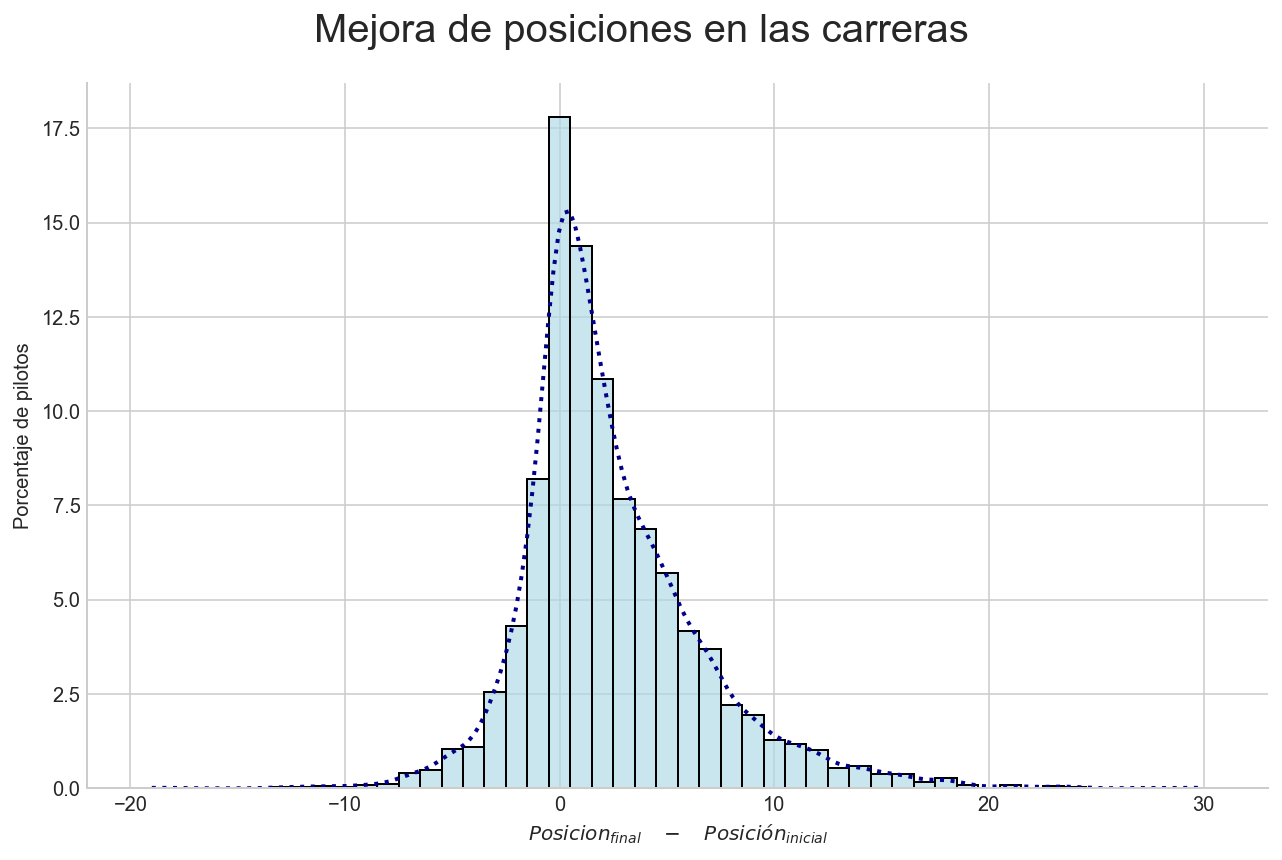

In [35]:
import seaborn as sns
fg = sns.displot(data=df_results_perform_hist['performance'], stat="percent", discrete=True, height=6, aspect=1.5, color='lightblue', alpha=0.65, 
                 kde=True, line_kws={'linewidth': 2, 'linestyle':':'})

fg.ax.lines[0].set_color('darkblue')
fg.set(xlabel='$Posicion_{final} \quad  -  \quad  Posición_{inicial}$' , ylabel = 'Porcentaje de pilotos');

fg.fig.subplots_adjust(top=.9)
fg.fig.suptitle('Mejora de posiciones en las carreras', fontsize=20);

## Se observa como la mayoría de los pilotos que finalizan las carreras lo hacen en la misma posición que la de partida, o mejoran una/dos posiciones.

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 10</font>

Calcular las posiciones que, de media, han ganado los pilotos **en las carreras finalizadas**. Mostrar el resultado para los cinco pilotos que más destacan en este aspecto, junto a su nombre, apellidos y nacionalidad.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Este ejercicio **es  difícil**. 
</div>


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
    
* Al igual que en el ejercicio anterior, crear una nuevo `DataFrame` que incorpore una columna denominada `pos_won` obtenida al operar con las columnas `grid` y `position`, y a partir de los resultados correspondientes a carreras terminadas (en los que `statusId==1`). Se puede hacer creando la nueva columna, o un nuevo *DataFrame* mediante `DataFrame.assign()`.
    
* El *DataFrame* resultante se ha de agrupar por piloto, se ha de obtener la media de la columna `pos_won` y seleccionar los cinco mayores valores. Como el resultado es una *Series*, se debe convertir a *DataFrame* con `Series.to_frame()`. También se puede generar directamente un *DataFrame* accediendo a la columna mediante una lista de un elemento.
    
* El resultado se ha de fundir con la `df_drivers`. Es importante gestionar bien cómo (`how`).
    
* Por último, devolver las columas `forename`, `surname`, `nationality` y `pos_won` del resultado de la fusión.
    
* Este ejercicio se puede hacer de forma elegante, sin crear explícitamente estructuras intermedias, mediante *method chaining*, aunque recomendamos encarecidamente dejar esto para el final, cuando se tenga el Capstone resuelto.
    
</details> 



In [36]:
df_results_pm=df_results.loc[(df_results['grid']<=5) & (df_results['position']<=3) & (df_results['statusId']==1)].copy()
df_results_pm['pos_won'] = df_results_pm['grid']-df_results_pm['position']
#df_results_pm

In [37]:
series_won = df_results_pm.groupby('driverId')['pos_won'].mean()
df_results_pm3 = series_won.to_frame(name= 'pos_won')
#df_results_pm3.nlargest(5, 'pos_won')

In [38]:
df_results_pm3 = pd.merge(df_results_pm3, df_drivers, how='inner', on='driverId')
#df_results_pm3

In [39]:
df_results_pw = df_results_pm3[['forename', 'surname', 'nationality', 'pos_won']]

In [40]:
df_results_pw = df_results_pw.nlargest(5, 'pos_won')#.sort_values(by='pos_won', ascending=False).nlargest(5, 'pos_won')
df_results_pw

,forename,surname,nationality,pos_won
driverId,,,,
65,Johnny,Herbert,British,4.0
593,Johnnie,Parsons,American,4.0
306,Jean-Pierre,Beltoise,French,3.0
340,John,Love,Rhodesian,3.0
723,Rudi,Fischer,Swiss,3.0


¿Cuantas carreras ha disputado y concluido el piloto más destacado en este aspecto?

In [41]:
driver_id = df_results_pw.index.values[0]
driver_forename = df_results_pw['forename'].values[0]
driver_surname = df_results_pw['surname'].values[0]
driver_pos_won = df_results_pw['pos_won'].values[0]
driver_id_races = df_results.loc[(df_results['driverId']==driver_id) & (df_results['statusId']==1)]['driverId'].count()

print(f'El piloto {driver_forename} {driver_surname} ha disputado {driver_id_races} carreras, y suele ganar {driver_pos_won:.2f} posiciones de media en cada carrera.')

El piloto Johnny Herbert ha disputado 29 carreras, y suele ganar 4.00 posiciones de media en cada carrera.


Puede apreciarse que la información está viciada porque incluye a pilotos que han competido muy pocas veces y les ha ido muy bien. Repetir el ejercicio anterior, pero utilizando solamente datos de aquellos pilotos que han finalizado al menos 75 carreras.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
    
* Este ejercicio es similar al anterior, pero hay que incorporar un paso intermedio. Una vez obtenidas las posiciones ganadas a partir de `df_results`, computando la diferencia entre `grid` y `posición` en todos los resultados correspondientes a carreras terminadas (`statusId==1`), hay que filtrar los resultados correspondientes a los pilotos que han concluido 75 carreras o más. Para ello, se ha de utilizar `DataFrame.groupby().filter()`.
    
* A pesar de la complejidad, también se puede hacer este ejercicio mediante *method chaining*.
    
    
</details> 


In [42]:
df_results_pm = df_results.loc[(df_results['grid']<=5) & (df_results['position']<=3) & (df_results['statusId']==1)].copy()
df_results_pm['pos_won'] = df_results_pm['grid']-df_results_pm['position']
#df_results_pm

In [43]:
def check_df(df_group):
    return len(df_group)>=75

df_results_pm_75 = df_results_pm.groupby('driverId').filter(check_df)[['driverId','pos_won']].groupby('driverId')#.nlargest(5)
#df_results_pm_75

In [44]:
series_75 = df_results_pm_75['pos_won'].mean()
#series_75
df_results_75_final = series_75.to_frame(name= 'pos_won_mean')
#df_results_75_final #.nlargest(5, 'pos_won')

In [45]:
df_75 = pd.merge(df_results_75_final, df_drivers, left_on='driverId', right_on='driverId')
#df_75

In [46]:
df_75 = df_75.sort_values(by='pos_won_mean', ascending=False)#.nlargest(5, 'pos_won_mean')
#df_75

In [47]:
driver_id_75 = df_75.index.values[0]
driver_forename_75 = df_75['forename'].values[0]
driver_surname_75 = df_75['surname'].values[0]
driver_pos_won_mean = df_75['pos_won_mean'].values[0]

In [48]:
amount_races = df_results.loc[(df_results['driverId']==driver_id_75) & (df_results['statusId']==1)]['driverId'].count()
amount_races
print(f'El piloto {driver_forename_75} {driver_surname_75} ha disputado {amount_races} carreras, y suele ganar {driver_pos_won_mean:.2f} posiciones de media en cada carrera.')

El piloto Fernando Alonso ha disputado 220 carreras, y suele ganar 1.07 posiciones de media en cada carrera.


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. Escuderías</font>
<br>

El elemento fundamental en Fórmula 1 es el coche. La diferencia entre unos equipos y otros es tan alta que, para muchos, es una competición entre escuderías. 

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 11</font>

Leer los datos de las escudarías, almacenadas en el archivo `data/constructors.csv` y almacenarlos en un *DataFrame* denominado `df_constructors`. Utilizar la primera columna como índice.

In [49]:
df_constructors = pd.read_csv('./data/constructors.csv', index_col='constructorId')
#df_constructors.head()

Mostrar los nombres y nacionalidades de los cinco constructores que han ganado más carreras a lo largo de la historia de la competición.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
      
* Hay que acceder a los resultados correspondientes a victorias, es decir, donde `position==1`.
    
* Extraer las victorias por constructor agrupando por `constructorId`, calculando el número de elementos por grupo, y generando con el resultado un nuevo *DataFrame*. Renombrar la columna correspondiente a `wins`.
    
* Fundir el resultado con `df_constructors`, que contiene los datos de cada constructor.
 
* Mostrar las columnas `name`, `nationality` y `wins` del *DataFrame* resultante.
    
    
</details> 


In [50]:
df_constr =  pd.merge(df_constructors, df_results[df_results['position']==1]
              .groupby('constructorId')['position']
              .agg(wins=len)
              .sort_values(by='wins', ascending=False)
              .rename(columns = {'position':'wins'}), 
            left_on='constructorId', right_on='constructorId')[['name', 'nationality', 'wins']].nlargest(5, 'wins')

df_constr

,name,nationality,wins
constructorId,,,
6,Ferrari,Italian,243
1,McLaren,British,179
131,Mercedes,German,124
3,Williams,British,114
9,Red Bull,Austrian,84


Mostrar los puntos (columna `points`) que ganó `Fernando Alonso` con cada constructor, dando además el nombre y la nacionalidad del constructor.


<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
    
* Se trata de agrupar el *DataFrame* `df_results_alo` en función del constructor, y sumar los puntos (`points`) por cada grupo. 
    
* El resultado, representado como un *DataFrame*, se puede fundir con `df_constructors` para mostrar además el nombre del constructor y la nacionalidad.
    
    
</details> 


In [51]:
df_results_alo_points = pd.merge(df_constructors, df_results_alo
                          .groupby(['constructorId'])['points']
                          .sum()
                          .sort_values(ascending=False)
                          .to_frame(),
                          left_on='constructorId', right_on='constructorId')
df_results_alo_points[['name', 'nationality', 'points']].nlargest(5, 'points')

,name,nationality,points
constructorId,,,
6,Ferrari,Italian,1180.0
4,Renault,French,464.0
1,McLaren,British,205.0
214,Alpine F1 Team,French,100.0


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Circuitos</font>
<br>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 12</font>

Por otra parte, el archivo `data/circuits.csv` contiene información relativa a cada uno de los circuitos. Leerlo y almacenarlo en el *DataFrame* `df_circuits`, utilizando la primera columna, `circuitId` como índice.

In [52]:
df_circuits = pd.read_csv('./data/circuits.csv', index_col='circuitId', na_values='\\N')
df_circuits.head()

,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park


In [53]:
#df_results.head()

In [54]:
#df_races.head()

Mostrar los 5 circuitos más rápidos, entendiendo como tales aquellos para los que la media de las 100 vueltas más rápidas (cien valores más altos de `fastestLapSpeed`) es más alta.

**Nota:** Obviamente, este criterio es mejorable. Pero es un ejemplo. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Este ejercicio **es el más difícil**. Quizá se puede dejar para el final.
</div>


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
Este ejercicio se puede resolver en varios pasos, y tiene similitudes con los anteriores.
* En primer lugar, se pueden fundir los *DataFrames* `df_results` y `df_races` para poder asociar resultados con circuitos. Siempre es importante indicar de manera explícita qué índices queremos que tenga el conjunto resultante.
* Hay que agrupar el resultado por circuito (`circuitId`) y obtener el resultado para cada grupo.
* Para obtener parte de la información requerida, se puede utilizar `DataFrame.groupby().apply()`. La función pasada a `apply` toma como argumento un *DataFrame*, y devuelve la media de los 100 valores más altos para `fastestLapSpeed`. Al utilizar esta función con `DataFrame.groupby.apply()` devuelve esa información para cada grupo.
* Una vez devuelta la información para cada circuito, se pueden tomar los 5 valores más altos.
* Por último, el resultado se puede convertir a *DataFrame* y se puede hacer un merge con `df_circuits` para mostrar todos los datos de los circuitos.
    
</details> 


In [55]:
df_results_races = pd.merge(df_results, df_races, how='left', on='raceId')
df_result_100 = pd.merge(df_circuits, (df_results_races[['raceId','circuitId', 'fastestLapSpeed']]
                                       .sort_values('fastestLapSpeed',ascending=False)
                                       .groupby('circuitId')['fastestLapSpeed']
                                       .apply(lambda grp: grp.nlargest(100).mean())
                                       .nlargest(5)
                                       .to_frame(name= 'mean_speed')),
                         how='right', on='circuitId')

df_result_100

,circuitRef,name,location,country,lat,lng,alt,url,mean_speed
circuitId,,,,,,,,,
14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...,249.98647
77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.10440,15.0,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,238.65150
9,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153.0,http://en.wikipedia.org/wiki/Silverstone_Circuit,234.17830
13,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,233.47847
70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.76470,678.0,http://en.wikipedia.org/wiki/Red_Bull_Ring,228.07410


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 13</font>

Calcular el resultado anterior (los circuitos más rápidos) con los datos relativos a `Fernando Alonso`, almacenados en `df_results_alo`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Solo hay que cambiar el *DataFrame* de partida, que ahora es `df_results_alo`.
    
</details> 

In [56]:
df_results_races_alo = pd.merge(df_results_alo, df_races, how='left', on='raceId')
df_result_100 = pd.merge(df_circuits, (df_results_races_alo[['raceId','circuitId', 'fastestLapSpeed']]
                                       .sort_values('fastestLapSpeed',ascending=False)
                                       .groupby('circuitId')['fastestLapSpeed']
                                       .apply(lambda grp: grp.nlargest(100).mean())
                                       .to_frame(name= 'mean_speed')
                                       .nlargest(5, 'mean_speed')),
                         how='right', on='circuitId')

df_result_100

,circuitRef,name,location,country,lat,lng,alt,url,mean_speed
circuitId,,,,,,,,,
14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...,243.132556
9,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153.0,http://en.wikipedia.org/wiki/Silverstone_Circuit,226.850250
13,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,225.016143
78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.45420,NaN,http://en.wikipedia.org/wiki/Losail_Internatio...,223.437000
22,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.54100,45.0,http://en.wikipedia.org/wiki/Suzuka_Circuit,222.162714


Calcular también en qué circuitos obtuvo `Fernando Alonso`, de media, mejor posición.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Se trata de fundir los resultados de alonso con `df_races` para disponer del circuito al que corresponde cada carrera (similar al anterior).
* Después se agrupa el *DataFrame* resultante por `circuitId`, se obtiene la posición media, y se devuelven los cinco valores más pequeños.
* Por último, el resultado se puede fundir con `df_circuits` para que se muestren los datos de los circuitos.
    
</details> 

In [57]:
df_results_races_pos = pd.merge(df_results_alo, df_races, how='left', on='raceId')
df_result_pos= pd.merge(df_circuits, (df_results_races_pos[['raceId','circuitId', 'position']]
                                       .sort_values('position',ascending=False)
                                       .groupby('circuitId')['position']
                                       .mean()
                                       .to_frame(name= 'mean_pos')
                                       .nsmallest(5, 'mean_pos')),
                         how='right', on='circuitId')

df_result_pos

,circuitRef,name,location,country,lat,lng,alt,url,mean_pos
circuitId,,,,,,,,,
16,fuji,Fuji Speedway,Oyama,Japan,35.3717,138.92700,583.0,http://en.wikipedia.org/wiki/Fuji_Speedway,1.000000
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,2.800000
78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.45420,NaN,http://en.wikipedia.org/wiki/Losail_Internatio...,3.000000
14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...,3.222222
20,nurburgring,Nürburgring,Nürburg,Germany,50.3356,6.94750,578.0,http://en.wikipedia.org/wiki/N%C3%BCrburgring,3.250000


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

**Opcional:** Mostar todos los circuitos en un mapa con `folium`. En la libreta de ejercicios con *matplotlib* tenéis un ejemplo de cómo se hace.

In [58]:
!pip install folium

In [59]:
import folium

In [60]:
##  Circuitos en los que Fernándo Alonso obtuvo, de media, la mejor posición.

tiles = 'OpenStreetMap'
world_figure = folium.Figure(width=600, height=400)
world_figure = folium.Map(location=[30, 0], tiles=tiles, zoom_start=2).add_to(world_figure)

# Fotos satélite
tiles = folium.TileLayer(
tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
attr = 'Esri',
name = 'Esri Satellite',
overlay = True,
control = True).add_to(world_figure)

for name,location in df_result_pos .iterrows():
    folium.Marker([location['lat'], location['lng']], popup=location['name']).add_to(world_figure)
world_figure

In [61]:
## Todos los circuitos existentes en el mundo

tiles = 'OpenStreetMap'
world_figure = folium.Figure(width=600, height=400)
world_figure = folium.Map(location=[30, 0], tiles=tiles, zoom_start=2).add_to(world_figure)

# Fotos satélite
tiles = folium.TileLayer(
tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
attr = 'Esri',
name = 'Esri Satellite',
overlay = True,
control = True).add_to(world_figure)

for name,location in df_circuits.iterrows():
    folium.Marker([location['lat'], location['lng']], popup=location['name']).add_to(world_figure)
world_figure

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Alonso vs rivales</font>
<br>

En esta parte del proyecto se valorarán los resultados de `Fernando Alonso` con respecto a sus rivales, es decir, con respecto a los pilotos que compitieron en las mismas carreras que él. Esto requiere manipular los datos, ya que la información no se puede obtener de forma directa.



---

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 14</font>
Mostrar los rivales (filas completas) contra los que ha competido Fernando Alonso.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
Anteriormente se filtraron los resultados de las carreras que terminó `Fernando Alonso`, y se almacenaron en `df_results_alo`. Se trata de:
* Seleccionar los datos correspondientes a esas carreras. 
* Acceder a los resultados (pilotos) que compitieron en ellas (y que no sean `Fernando Alonso`). Para ello es muy útil utilizar `Series.isin()`. Obtener los identificadores únicos de los pilotos.
* Por último, seleccionar los datos de estos pilotos en `df_drivers`.
    
</details> 


In [62]:
races_rivals = pd.DataFrame(set(df_results[ df_results['raceId']
                                           .isin(df_results_alo['raceId']
                                                 .values.tolist())]['driverId']), columns=['driverId'])

In [63]:
df_rivals_alonso = (pd.merge(races_rivals, df_drivers, left_on='driverId', right_on='driverId').rename_axis('id'))
df_rivals_alonso = df_rivals_alonso.loc[df_rivals_alonso['driverId']!= 4]
df_rivals_alonso.style.hide(axis='index')

driverId,driverRef,number,code,forename,surname,dob,nationality,url
1,hamilton,44.000000,HAM,Lewis,Hamilton,1985-01-07 00:00:00,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,nan,HEI,Nick,Heidfeld,1977-05-10 00:00:00,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.000000,ROS,Nico,Rosberg,1985-06-27 00:00:00,German,http://en.wikipedia.org/wiki/Nico_Rosberg
5,kovalainen,nan,KOV,Heikki,Kovalainen,1981-10-19 00:00:00,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
6,nakajima,nan,NAK,Kazuki,Nakajima,1985-01-11 00:00:00,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
7,bourdais,nan,BOU,Sébastien,Bourdais,1979-02-28 00:00:00,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bourdais
8,raikkonen,7.000000,RAI,Kimi,Räikkönen,1979-10-17 00:00:00,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen
9,kubica,88.000000,KUB,Robert,Kubica,1984-12-07 00:00:00,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
10,glock,nan,GLO,Timo,Glock,1982-03-18 00:00:00,German,http://en.wikipedia.org/wiki/Timo_Glock
11,sato,nan,SAT,Takuma,Sato,1977-01-28 00:00:00,Japanese,http://en.wikipedia.org/wiki/Takuma_Sato


Obtener los datos de los 10 rivales a los que más veces se ha enfrentado `Fernando Alonso`, y almacenarlos en el *DataFrame* `df_fa_vs`.


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Seleccionar los resultados (de `df_results`) correspondientes a las carreras en las que compitió `Fernando Alonso`, y que no corresponden a `Fernando Alonso`. 
* Hay que agrupar por piloto ( `driverId`), calcular el tamaño de los grupos, y tomar los 10 mayores.
* Por último, fundir con `df_drivers` para mostrar todos los datos de los pilotos (no solo el id).
    
</details> 

In [64]:
list_races_alonso = set(df_results.loc[(df_results['driverId']==4)]['raceId'])
#list_races_alonso

In [65]:
id_rivals_alonso = df_results[ df_results['raceId'].isin(list_races_alonso) ]
id_rivals_alonso = id_rivals_alonso.loc[id_rivals_alonso['driverId']!= 4].groupby('driverId')['driverId'].count()
id_rivals_alonso = id_rivals_alonso.nlargest(10).to_frame(name= 'amount_races')
#id_rivals_alonso 

In [66]:
df_fa_vs = pd.merge(id_rivals_alonso, df_drivers, left_on='driverId', right_on='driverId')
df_fa_vs

,amount_races,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
8,294,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
18,272,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
1,261,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
13,252,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
20,250,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,204,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,200,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
815,189,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez
817,182,ricciardo,3.0,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

A continuación se hará un balance de los resultados de `Fernando Alonso` con respecto a sus rivales. Para ello, es necesario pasar por una serie de pasos intermedios.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 15</font>


Obtener una tabla en la que cada fila represente cada una de las carreras (`raceId`) concluidas por `Fernando Alonso`, cada columna un piloto (`driverId`) que haya participado (y concluido) en alguna de esas carreras, y el resultado la posición (`position`) del piloto. Almacenar el resultado en un *DataFrame* denominado `df_fa_vs_other`.

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* El primer paso, al igual que se ha hecho anteriormente, es obtener los `raceId` de todas las carreras terminadas por `Fernando Alonso`.
* Después, se han de seleccionar aquellos resultados correspondientes a pilotos que han terminado las carreras (`statusId==1`) y en los que `raceId` sea una de las carreras terminadas por `Fernando Alonso` (dos condiciones).
* La tabla puede hacer con `DataFrame.unstack()`, fijando primero como índice la carrera y el piloto.
* Se puede hacer el ejercicio con *method chaining*.    
</details> 


In [67]:
# Obtengo la lista de las carreras terminadas de Fernándo Alonso
races_alonso = df_results_alo['raceId'].values.tolist()
#races_alonso

In [68]:
# Obtengo la lista de las carreras terminadas de los rivales de Fernándo Alonso
df_races_rivals = df_results.loc[(df_results['driverId']!= 4) & (df_results['statusId']== 1)]
#df_races_rivals 

In [69]:
# Escojo las carreras en las que corrió Alonso
df_races_rivals  = df_races_rivals [df_races_rivals ['raceId'].isin(races_alonso)][['raceId','driverId','position']].set_index(['raceId','driverId'])

# Creo la tabla
df_fa_vs_other = df_races_rivals.unstack(level=1)
#df_fa_vs_other

In [70]:
# Para ver mejor la tabla, sustituyo NaN por -
df_fa_vs_other_pretty = df_races_rivals.unstack(level=1, fill_value='-')
df_fa_vs_other_pretty

position                                                  ...       \
driverId      1     2    3     5   6     7     8     9    10  11   ...  844   
raceId                                                             ...        
1               -  10.0  6.0     -   -   8.0     -     -  4.0   -  ...    -   
3             6.0  12.0    -   5.0   -  11.0  10.0  13.0  7.0   -  ...    -   
4             4.0     -  9.0  12.0   -  13.0   6.0     -  7.0   -  ...    -   
5               -   7.0  8.0     -   -     -     -     -    -   -  ...    -   
6               -     -  6.0     -   -   8.0   3.0     -    -   -  ...    -   
...           ...   ...  ...   ...  ..   ...   ...   ...  ...  ..  ...  ...   
1080          8.0     -    -     -   -     -     -     -    -   -  ...  4.0   
1081          4.0     -    -     -   -     -     -     -    -   -  ...    -   
1082          3.0     -    -     -   -     -     -     -    -   -  ...  5.0   
1083          3.0     -    -     -   -     -     -     -    -   -  ...  4.0   
1085          2.0     -    -     -   -     -     -     -    -   -  ...    -   

                                                          
driverId 845   846  847   848   849   852 853   854  855  
raceId                                                    
1          -     -    -     -     -     -   -     -    -  
3          -     -    -     -     -     -   -     -    -  
4          -     -    -     -     -     -   -     -    -  
5          -     -    -     -     -     -   -     -    -  
6          -     -    -     -     -     -   -     -    -  
...       ..   ...  ...   ...   ...   ...  ..   ...  ...  
1080       -   6.0  5.0     -     -     -   -     -    -  
1081       -   9.0  3.0     -     -     -   -     -    -  
1082       -  15.0  4.0  13.0  16.0     -   -     -  8.0  
1083       -   6.0    -     -  12.0  14.0   -   8.0    -  
1085       -   7.0  3.0  13.0     -     -   -  15.0    -  

[220 rows x 78 columns]

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 16</font>

A partir del *DataFrame* `df_fa_vs_other` mostrar los 10 rivales ha batido más veces `Fernando Alonso`. 


<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Aplicando `Dataframe.apply()` por filas, se puede crear un *DataFrame* en el que si la posición está por encima de la de `Fernando Alonso` el valor es 1, y si no 0. 
* La suma por columnas de este *DataFrame* devuelve una serie con el número de veces que `Fernando Alonso` ha batido a cada rival. 
* Se tomarían los 10 mayores valores. 
* Se puede fundir con `df_drivers` para mostrar también el nombre y los datos de cada piloto.  
</details> 





In [71]:
df_alonso_victories = (df_fa_vs_other.apply(lambda df_row: df_row > df_row[4], axis=1)
                      .fillna(0)
                      .sum(axis = 0)
                      .nlargest(10)
                      .to_frame()
                      .reset_index()
                      .rename(columns={0:'times_alonso_won'})
                      .merge(df_drivers, on="driverId", how='inner'))
                                
df_alonso_victories

,level_0,driverId,times_alonso_won,driverRef,number,code,forename,surname,dob,nationality,url
0,position,15,3,trulli,NaN,TRU,Jarno,Trulli,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli
1,position,21,3,fisichella,NaN,FIS,Giancarlo,Fisichella,1973-01-14,Italian,http://en.wikipedia.org/wiki/Giancarlo_Fisichella
2,position,3,2,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,position,7,2,bourdais,NaN,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
4,position,9,2,kubica,88.0,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
5,position,16,2,sutil,99.0,SUT,Adrian,Sutil,1983-01-11,German,http://en.wikipedia.org/wiki/Adrian_Sutil
6,position,18,2,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
7,position,24,2,liuzzi,NaN,LIU,Vitantonio,Liuzzi,1980-08-06,Italian,http://en.wikipedia.org/wiki/Vitantonio_Liuzzi
8,position,1,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
9,position,5,1,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Mostrar ahora los 10 rivales han batido más veces a `Fernando Alonso`. 

<br>

<details>    
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>
</summary>
  
* Se procede de forma similar al anterior, pero cambiando el cuerpo de `DataFrame.apply()`. 
</details> 

In [72]:
df_alonso_defeats = (df_fa_vs_other.apply(lambda df_row: df_row < df_row[4], axis=1)
                      .fillna(0)
                      .sum(axis = 0)
                      .nlargest(10)
                      .to_frame()
                      .reset_index()
                      .rename(columns={0:'times_alonso_lost'})
                      .merge(df_drivers, on="driverId", how='inner'))
                                
df_alonso_defeats

,level_0,driverId,times_alonso_lost,driverRef,number,code,forename,surname,dob,nationality,url
0,position,20,10,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,position,2,9,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,position,5,7,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
3,position,8,7,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
4,position,9,7,kubica,88.0,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
5,position,1,6,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
6,position,3,6,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
7,position,10,6,glock,NaN,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock
8,position,18,6,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
9,position,22,6,barrichello,NaN,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section7"></a>
## <font color="#00586D"> 7. Conclusiones y líneas de trabajo para TFM</font>
<br>

Este trabajo ha servido para familiarizarnos con la herramienta *pandas* y hacer algunas operaciones algo más complejas orientadas al análisis. Aunque se trata de un primer proyecto de carácter *instrumental*, desde el punto de vista de los datos nos ha permitido además obtener información en principio desconocida, o al menos en parte. 

Como puede apreciarse, el conjunto de datos es más amplio, y contiene información sobre tiempos por vuelta, temporadas, etc. Si os interesa o apetece, es posible extender el análisis que se ha hecho para que contemple esas y otras cuestiones.

### <font color="#00586D"> Líneas de trabajo para TFM</font>

Con respecto al TFM, existe la posibilidad de hacer un portfolio con extensiones o trabajo adicional relacionado con los *Capstones* del máster, incluyendo varios de ellos elegidos librermente. El trabajo adicional que pudiéseis hacer aquí podría estar enfocado hacia ese objetivo, y formar parte del portfolio. 

En ese sentido apuntar que, por lo general, el trabajo se acumula conforme transcurre el año, que el último proyecto se os da en mayo, y que quizá *algunos* prefiráis ir avanzando en un portfolio antes que comenzar un TFM al final. 

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>